In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from sklearn.metrics import root_mean_squared_error

In [17]:
def load_crime_data(dist_id, offense, subset="train"):
    data_path = f"../data/top_10_crimes/{dist_id}/{offense}/{subset}.csv"
    crime_df = pd.read_csv(data_path, parse_dates=[0], index_col=0)
    return crime_df

In [18]:
train_df = load_crime_data(1.0, "Auto Theft", subset="train")
test_df = load_crime_data(1.0, "Auto Theft", subset="test")

In [19]:
train_df.head()

,Crime_Count
Reported_Date,
2015-01-01,4
2015-01-02,0
2015-01-03,2
2015-01-04,2
2015-01-05,6


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3284 entries, 2015-01-01 to 2023-12-28
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Crime_Count  3284 non-null   int64
dtypes: int64(1)
memory usage: 51.3 KB


## AR PARAM

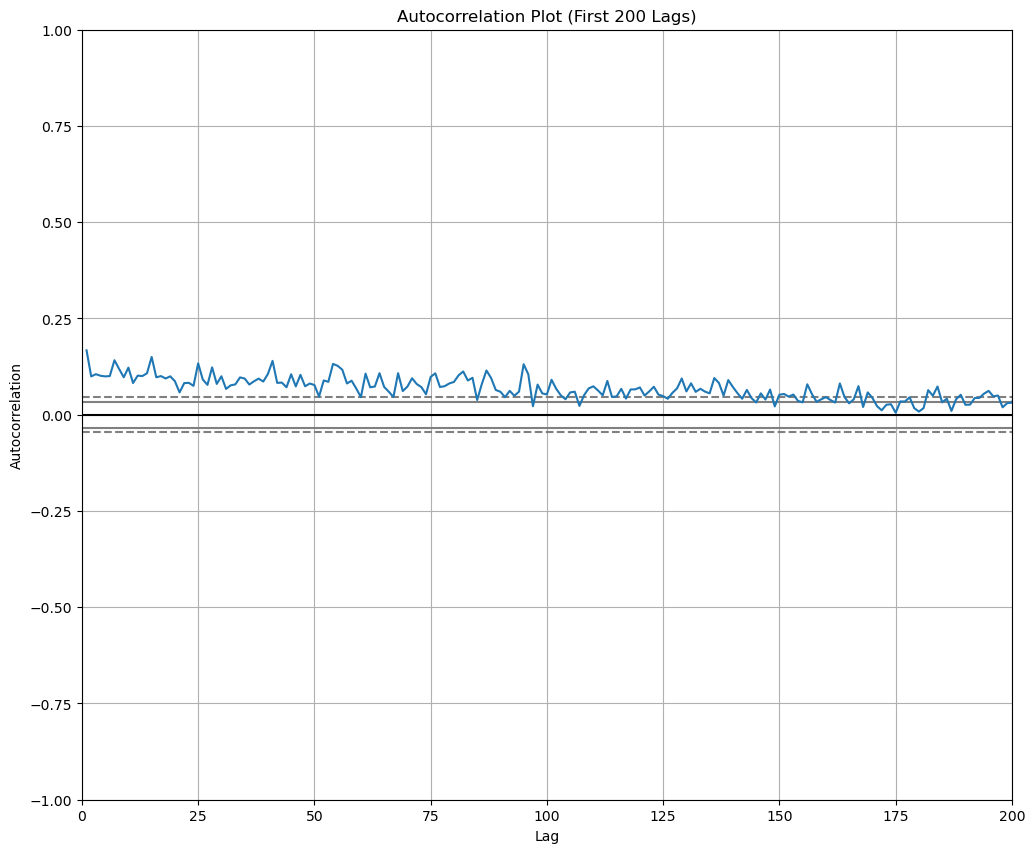

In [21]:
n_lags = 200
plt.figure(figsize=(12,10))
autocorrelation_plot(train_df)
plt.xlim(0, n_lags)
plt.title(f"Autocorrelation Plot (First {n_lags} Lags)")
plt.show()

> AR = 5-50

## I PARAM

In [22]:
def test_adf_stationary(data):
    result = adfuller(data)

    if result[1] > 0.05:
        return False
    else:
        return True

In [23]:
test_adf_stationary(train_df["Crime_Count"])

True

> I = 0

## Model training ARIMA

                               SARIMAX Results                                
Dep. Variable:            Crime_Count   No. Observations:                 3284
Model:                ARIMA(12, 0, 1)   Log Likelihood               -8339.703
Date:                Mon, 25 Nov 2024   AIC                          16709.406
Time:                        00:38:28   BIC                          16800.858
Sample:                    01-01-2015   HQIC                         16742.150
                         - 12-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1138      0.549      3.851      0.000       1.038       3.190
ar.L1          1.0643      0.014     75.996      0.000       1.037       1.092
ar.L2         -0.0812      0.024     -3.434      0.0

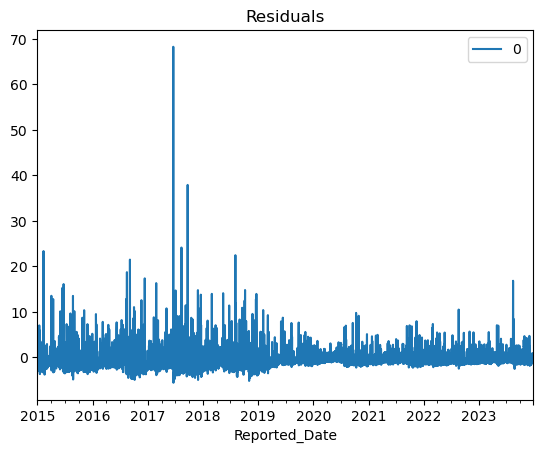

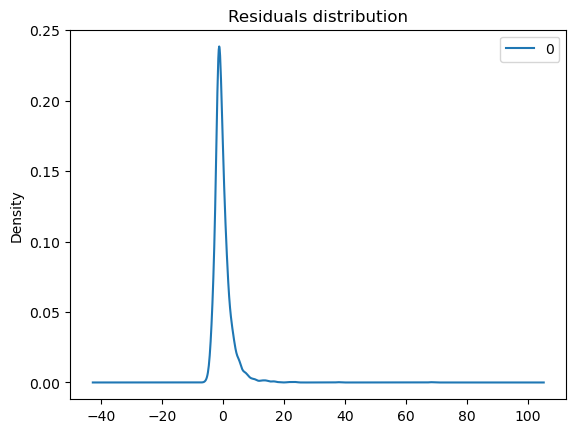

                 0
count  3284.000000
mean     -0.010705
std       3.067062
min      -5.630769
25%      -1.578388
50%      -0.675707
75%       0.822933
max      68.274487


In [ ]:
series = train_df
series.index = series.index.to_period('d')
# fit model
model = ARIMA(series, order=(12,0,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.title("Residuals")
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.title("Residuals distribution")
plt.show()
# summary stats of residuals
print(residuals.describe())

### Predictions

In [ ]:
history = [x for x in train_df["Crime_Count"]]
predictions = list()
test = test_df["Crime_Count"].to_list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(12,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = root_mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=1.495452, expected=1.000000
predicted=1.532628, expected=1.000000
predicted=1.364653, expected=0.000000
predicted=1.292764, expected=3.000000
predicted=1.566197, expected=0.000000
predicted=1.308674, expected=3.000000
predicted=1.735411, expected=1.000000
predicted=1.446900, expected=0.000000
predicted=1.403043, expected=0.000000
predicted=1.364142, expected=0.000000
predicted=1.438706, expected=0.000000
predicted=1.343953, expected=0.000000
predicted=1.307189, expected=0.000000
predicted=1.350843, expected=0.000000
predicted=1.045823, expected=0.000000
predicted=1.228668, expected=4.000000
predicted=1.432034, expected=2.000000
predicted=1.367666, expected=0.000000
predicted=1.144860, expected=0.000000
predicted=1.106562, expected=0.000000
predicted=1.091029, expected=1.000000
predicted=1.203678, expected=0.000000


Test RMSE: 1.559


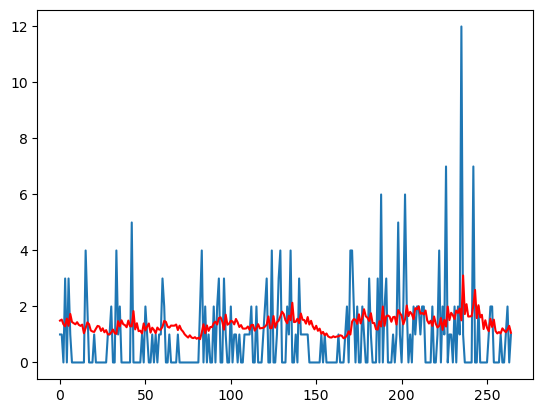

In [ ]:
# evaluate forecasts
rmse = root_mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

---